C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.7900 - mae: 0.6023 - val_loss: 0.4255 - val_mae: 0.4671
Epoch 2/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.4383 - mae: 0.4567 - val_loss: 0.3828 - val_mae: 0.4244
Epoch 3/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3814 - mae: 0.4316 - val_loss: 0.3920 - val_mae: 0.4140
Epoch 4/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3443 - mae: 0.4143 - val_loss: 0.3716 - val_mae: 0.4290
Epoch 5/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3710 - mae: 0.4208 - val_loss: 0.3542 - val_mae: 0.4183
Epoch 6/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.3561 - mae: 0.4116 - val_loss: 0.3743 - val_mae: 0.4056
Epoch 7/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3554 - mae: 0.4049 - val_loss: 0.3892 - val_mae: 0.4139
Epoch 8/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3679 - mae: 0.4096 - val_loss: 0.4166 - val_mae: 0.4076
Epoch 9/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - lo

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 1.1115 - mae: 0.6971 - val_loss: 0.4218 - val_mae: 0.4458
Epoch 2/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.4367 - mae: 0.4596 - val_loss: 0.3820 - val_mae: 0.4371
Epoch 3/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.4006 - mae: 0.4491 - val_loss: 0.4359 - val_mae: 0.4326
Epoch 4/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.4055 - mae: 0.4536 - val_loss: 0.4529 - val_mae: 0.4821
Epoch 5/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4249 - mae: 0.4492 - val_loss: 0.3749 - val_mae: 0.4315
Epoch 6/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3887 - mae: 0.4424 - val_loss: 0.3976 - val_mae: 0.4371
Epoch 7/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3903 - mae: 0.4468 - val_loss: 0.3653 - val_mae: 0.4204
Epoch 8/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3945 - mae: 0.4414 - val_loss: 0.5438 - val_mae: 0.4347
Epoch 9/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.4588 

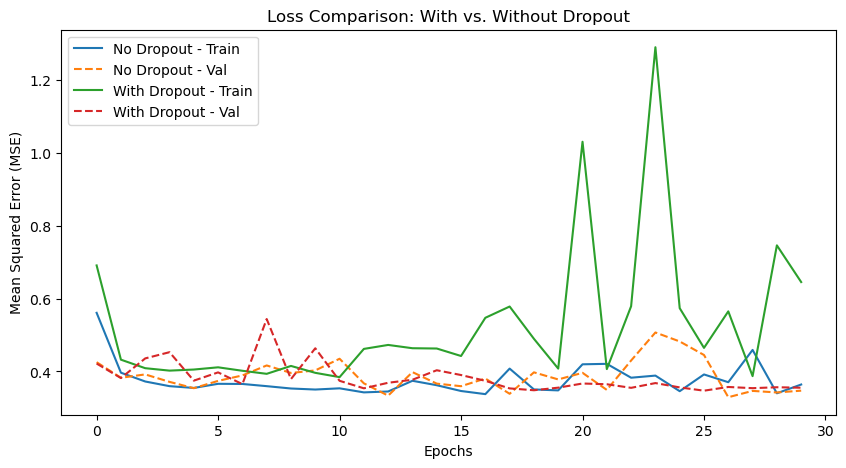

In [5]:
# Import required libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

# Step 1: Load the California Housing dataset
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

# Convert to Pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target  # Target variable (House Prices)

# Step 2: Data Preprocessing
X = df.drop(columns=['Price'])  # Features
y = df['Price']  # Target (house prices)

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Define a function to create the regression model
def create_regression_model(with_dropout=True):
    model = Sequential()
    model.add(Dense(20, activation='relu', input_shape=(X_train.shape[1],)))  # Hidden layer

    if with_dropout:
        model.add(Dropout(0.1))  # Apply dropout only if enabled

    model.add(Dense(1))  # Output layer (1 neuron for regression)
    
    # Compile the model
    model.compile(optimizer=RMSprop(learning_rate=0.01), loss='mse', metrics=['mae'])
    return model

# Step 4: Train model WITHOUT Dropout
model_no_dropout = create_regression_model(with_dropout=False)
history_no_dropout = model_no_dropout.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=32, verbose=1
)

# Step 5: Train model WITH Dropout
model_with_dropout = create_regression_model(with_dropout=True)
history_with_dropout = model_with_dropout.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=32, verbose=1
)

# Step 6: Plot loss comparison between models
def plot_loss_comparison(history_no_dropout, history_with_dropout):
    plt.figure(figsize=(10, 5))

    # Plot MSE Loss for both models
    plt.plot(history_no_dropout.history['loss'], label='No Dropout - Train', linestyle='solid')
    plt.plot(history_no_dropout.history['val_loss'], label='No Dropout - Val', linestyle='dashed')
    plt.plot(history_with_dropout.history['loss'], label='With Dropout - Train', linestyle='solid')
    plt.plot(history_with_dropout.history['val_loss'], label='With Dropout - Val', linestyle='dashed')

    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.legend()
    plt.title('Loss Comparison: With vs. Without Dropout')
    plt.show()

# Call the function to plot results
plot_loss_comparison(history_no_dropout, history_with_dropout)
